In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabaz_score
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams['font.family'] = ['Arial Unicode MS'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

In [9]:
# 加载数据
data_ori = pd.read_csv('./heros.csv', encoding='gb18030')
features = [u'最大生命', u'生命成长', u'初始生命', u'最大法力', u'法力成长',
            u'初始法力', u'最高物攻', u'物攻成长', u'初始物攻', u'最大物防',
            u'物防成长', u'初始物防', u'最大每5秒回血', u'每5秒回血成长', u'初始每5秒回血',
            u'最大每5秒回蓝', u'每5秒回蓝成长', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
data = data_ori[features]

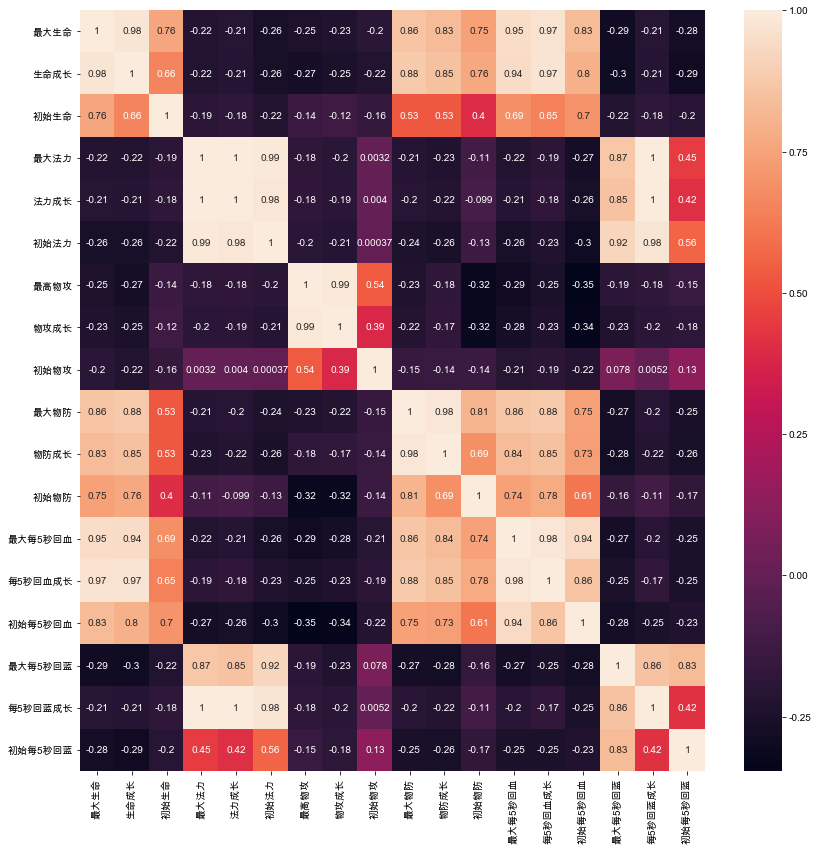

In [12]:
# 对英雄属性之间的关系进行可视化分析
corr = data.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True)

In [15]:
# 相关性大的属性保留一个，因此可以对属性降维
features_remain = [u'最大生命', u'初始生命', u'最大法力', u'最高物攻', u'初始物攻',
                   u'初始物攻', u'最大物防', u'初始物防', u'最大每5秒回血',
                   u'最大每5秒回蓝', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
data = data_ori[features_remain]
data[u'最大攻速'] = data[u'最大攻速'].apply(lambda x: float(x.strip('%'))/100)
data[u'攻击范围'] = data[u'攻击范围'].map({'远程':1, '近战':0})
# 数据标准化
ss = StandardScaler()
data = ss.fit_transform(data)

In [17]:
# 构造GMM聚类
gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(data)
prediction = gmm.predict(data)
print(prediction)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 1 2 1 2 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0]


In [19]:
# 评估聚类结果，分数越高效果越好
print(calinski_harabaz_score(data, prediction))

20.0890023738655
